In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titanic = pd.read_csv("https://learnenough.s3.amazonaws.com/titanic.csv")

In [3]:
passenger_age = titanic[["Age" , "Survived"]].dropna()

In [4]:
passenger_age.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [5]:
passenger_ages = passenger_age["Age"].unique()

In [6]:
passenger_ages.sort()

In [7]:
 passenger_ages

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [8]:
survival_rate = passenger_age.groupby("Age")["Survived"].mean()

In [9]:
survival_rate.loc[30:40]

Age
30.0    0.400000
30.5    0.000000
31.0    0.470588
32.0    0.500000
32.5    0.500000
33.0    0.400000
34.0    0.400000
34.5    0.000000
35.0    0.611111
36.0    0.500000
36.5    0.000000
37.0    0.166667
38.0    0.454545
39.0    0.357143
40.0    0.461538
Name: Survived, dtype: float64

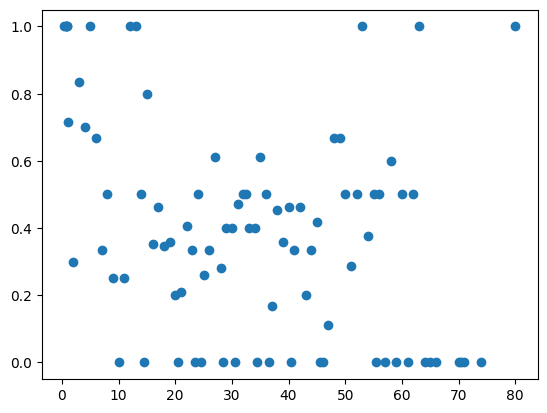

In [11]:
fig, ax = plt.subplots()
ax.scatter(passenger_ages, survival_rate)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
X = np.array(passenger_ages).reshape((-1, 1))
X[:10]

array([[0.42],
       [0.67],
       [0.75],
       [0.83],
       [0.92],
       [1.  ],
       [2.  ],
       [3.  ],
       [4.  ],
       [5.  ]])

In [15]:
Y = np.array(survival_rate)

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, Y)

LinearRegression()

In [18]:
model.score(X, Y)

0.13539675574075116

In [22]:
m = model.coef_
b = model.intercept_

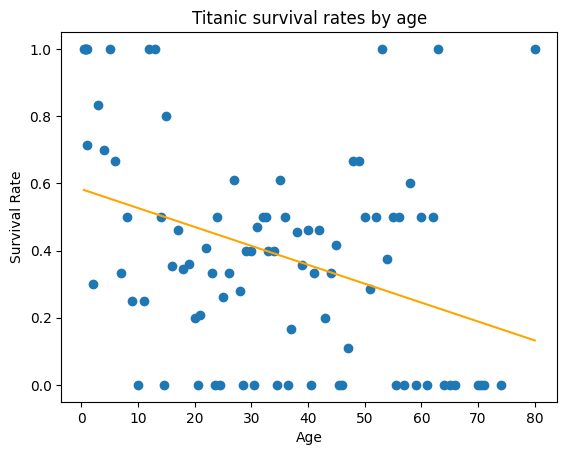

In [23]:
fig, ax = plt.subplots()
ax.scatter(passenger_ages, survival_rate)
ax.plot(passenger_ages, m * passenger_ages + b, color="orange")
ax.set_xlabel("Age")
ax.set_ylabel("Survival Rate")
ax.set_title("Titanic survival rates by age")
plt.show()